In [ ]:
!pip install torchtext

In [ ]:
import numpy as np
import pandas as pd
import polars as pl

import torch
import torch.nn as nn
import torchtext as tt
from torchtext.data.utils import get_tokenizer
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import seaborn as sns

import json

from collections import Counter
from copy import deepcopy as dc

In [ ]:
def get_json_file_into_data():
  f = open("drive/MyDrive/unificated.ndjson")
  #print(f.readline())

  lines = f.readlines()
  data = []
  for line in lines:
    print(line)
    break

  f.close()
  return data

In [ ]:
SELECTED = ["eventTime", "userAgent", "errorMessage", "eventType", "errorCode", "sourceIPAddress", "eventName", "eventSource", "awsRegion"]

def select_from_data(data):
  data_polished = []

  for line in data:
    obj = json.loads(line)

    n_obj = {}
    for field in obj:
      if field in SELECTED:
        if obj[field] == "" or obj[field] == None:
          n_obj[field] = "NaN"
        n_obj[field] = obj[field]

    #print(n_obj)
    #with open("drive/MyDrive/reduced.ndjson")
    data_polished.append(n_obj)

  df = pl.DataFrame(data_polished)
  df.write_ndjson("drive/MyDrive/data_polished.ndjson")
# print(len(select_from_data(get_json_file_into_data())))

In [ ]:
df = pl.read_ndjson("drive/MyDrive/data_polished.ndjson")
df.head(2)

userAgent,errorMessage,eventType,errorCode,sourceIPAddress,eventName,eventSource,awsRegion,eventTime
str,str,str,str,str,str,str,str,str
"""Boto3/1.9.201 …","""Request limit …","""AwsApiCall""","""Client.Request…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""us-west-1""","""2019-08-21T11:…"
"""Boto3/1.9.201 …","""We currently d…","""AwsApiCall""","""Server.Insuffi…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""ap-northeast-1…","""2019-08-21T11:…"


In [ ]:
# DO NOT RUN IT NOW, the initial parsing breaks if the datatime is converted now
# Is more valueable to be run later
df = df.with_columns(pl.col("eventTime").str.to_datetime())
df.head(2)

userAgent,errorMessage,eventType,errorCode,sourceIPAddress,eventName,eventSource,awsRegion,eventTime
str,str,str,str,str,str,str,str,"datetime[μs, UTC]"
"""Boto3/1.9.201 …","""Request limit …","""AwsApiCall""","""Client.Request…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""us-west-1""",2019-08-21 11:31:47 UTC
"""Boto3/1.9.201 …","""We currently d…","""AwsApiCall""","""Server.Insuffi…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""ap-northeast-1…",2019-08-21 11:31:47 UTC


In [ ]:
df = df.fill_null(strategy="forward")
df.shape

(1939207, 9)

In [ ]:
toker(
    "".join(
        [str(x) for x in df.select(pl.col("*").exclude("sourceIPAddress", "eventTime"))[0].to_numpy()]
        ).replace("[", "").translate({
            ord("["): None,
            ord("]"): None,
            ord("."): None,
            ord(","): None,
            ord("'"): None,
        })
    )

['boto3/19201',
 'python/2712',
 'linux/440-157-generic',
 'botocore/112201',
 'request',
 'limit',
 'exceeded',
 'awsapicall',
 'clientrequestlimitexceeded',
 'runinstances',
 'ec2amazonawscom',
 'us-west-1']

In [ ]:
df.to_numpy()[0, 1:-1]

array(['Request limit exceeded.', 'AwsApiCall',
       'Client.RequestLimitExceeded', '5.205.62.253', 'RunInstances',
       'ec2.amazonaws.com', 'us-west-1'], dtype=object)

In [ ]:
toker = get_tokenizer("basic_english")

TRANSLATION_VOCABULARY = {
              ord("["): None,
              ord("]"): None,
              ord("."): None,
              ord(","): None,
              ord("'"): None,
            }

def create_vocabulary(dataframe):
  counter_obj = Counter()
  dataset = dataframe.clone().select(pl.col("*").exclude("sourceIPAddress", "eventTime"))
  for d in dataset.rows():
    try:
      txt = " ".join([x for x in d]).translate(TRANSLATION_VOCABULARY)
    except:
      continue
    split_and_lowered = toker(txt)
    counter_obj.update(split_and_lowered)

  result = tt.vocab.vocab(counter_obj, min_freq=1)
  return result

In [ ]:
vocab = create_vocabulary(df)
print(len(vocab))

188250


In [ ]:
torch.save(vocab, "vocab_vers_2.pth")

In [ ]:
vocab = torch.load("vocab_vers_2.pth")

In [ ]:
for i in range(len(vocab)):
  print(vocab["linux/440-157-generic"])
  break

2


In [ ]:
vocab.set_default_index(-1)
def from_tuple_to_token(tup):
  #print(tup[-1])
  try:
    txt = " ".join([x for x in tup]).translate(TRANSLATION_VOCABULARY)
  except Exception as e:
    txt = "No data"
    print(f"WARNING: skipping {e} - {tup}")
  res = []
  norm = toker(txt)
  for i in norm:
    res.append(str(vocab[i]))
  return res

In [ ]:
# select(
#     pl.col("*").exclude("sourceIPAddress", "eventTime")
#     )

df = df.with_columns(
        pl.concat_str(
            pl.col("*").exclude("sourceIPAddress", "eventTime"),
            separator=" "
          ).alias("concatenated_list") # col("*").exclude("sourceIPAddress", "eventTime").arr.
    )
df.head(2)

userAgent,errorMessage,eventType,errorCode,sourceIPAddress,eventName,eventSource,awsRegion,eventTime,concatenated_list
str,str,str,str,str,str,str,str,str,str
"""Boto3/1.9.201 …","""Request limit …","""AwsApiCall""","""Client.Request…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""us-west-1""","""2019-08-21T11:…","""Boto3/1.9.201 …"
"""Boto3/1.9.201 …","""We currently d…","""AwsApiCall""","""Server.Insuffi…","""5.205.62.253""","""RunInstances""","""ec2.amazonaws.…","""ap-northeast-1…","""2019-08-21T11:…","""Boto3/1.9.201 …"


In [ ]:
sample = df.select(pl.col("eventTime", "sourceIPAddress", "concatenated_list"))
sample.head(2)

eventTime,sourceIPAddress,concatenated_list
str,str,str
"""2019-08-21T11:…","""5.205.62.253""","""Boto3/1.9.201 …"
"""2019-08-21T11:…","""5.205.62.253""","""Boto3/1.9.201 …"


In [ ]:
del df

In [ ]:
sample.head(2)

eventTime,sourceIPAddress,concatenated_list
str,str,str
"""2019-08-21T11:…","""5.205.62.253""","""Boto3/1.9.201 …"
"""2019-08-21T11:…","""5.205.62.253""","""Boto3/1.9.201 …"


In [ ]:
# f = open("output_tokenized_data.json", "w")
new_data = []
for i in sample.rows(named=True):
  tokenized_data = dict(i)
  tokens = from_tuple_to_token(i["concatenated_list"])
  tokenized_data["tokenized_value"] = torch.tensor([int(x) for x in tokens if x != -1]).float()
  #print(len(tokenized_data["tokenized_value"]))
  t_shape = tokenized_data["tokenized_value"].shape
  tokenized_data["tokenized_value"] = tokenized_data["tokenized_value"] @ torch.ones(t_shape).float()
  tokenized_data["tokenized_value"] = tokenized_data["tokenized_value"].item()

  new_data.append(tokenized_data)
  #print(tokenized_data["tokenized_value"].item())
  # f.write(json.dumps(tokenized_data))
  # f.write("\n")
  #break

df_new_data = pl.DataFrame(new_data)
df_new_data.head()
#f.close()

NameError: name 'sample' is not defined

non ho testato con tutto il log in questa implementazione però..

In [ ]:
df_new_data.write_csv("output_tensor_data.csv")

In [ ]:
df_new_data.write_csv("drive/MyDrive/output_tesor_data.csv")

# NEW DATA GENERATED

From now on, we can reset the kernel because the dataset that will be used will be the newst one.

In [ ]:
!du -h output_tensor_data.csv

716M	output_tensor_data.csv


In [ ]:
useragent_tokenized_dataset = []

def recreate_dataset_for_useragent():
  dataset = df.to_numpy()

  for i in dataset:
    results = []
    try:
      txt = i[0].item().replace(",", "").replace(".", "")
    except:
      print(f"WARNING: not parsed {i}")
      results.append([[-1]])
      continue
    split_and_lowered = toker(txt)
    for i in split_and_lowered:
      results.append(vocab[i])
    useragent_tokenized_dataset.append(results)
recreate_dataset_for_useragent()

# Start TRAINING AND LSTM

In [ ]:
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 39.6 MB/s eta 0:00:00


In [ ]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 24.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import polars as pl

import torch
import torch.nn as nn
import torchtext as tt
from torchtext.data.utils import get_tokenizer
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

import json
from tqdm import tqdm

from collections import Counter
from copy import deepcopy as dc

In [ ]:
df_new_data = pl.read_csv("drive/MyDrive/output_tesor_data.csv")

In [ ]:
df_new_data = df_new_data.with_columns(pl.col("eventTime").str.to_datetime())
df_new_data.head(2)

eventTime,sourceIPAddress,concatenated_list,tokenized_value
"datetime[μs, UTC]",str,str,f64
2019-08-21 11:31:47 UTC,"""5.205.62.253""","""Boto3/1.9.201 …",4.531885e6
2019-08-21 11:31:47 UTC,"""5.205.62.253""","""Boto3/1.9.201 …",9.160587e6


<Axes: xlabel='eventTime', ylabel='tokenized_value'>

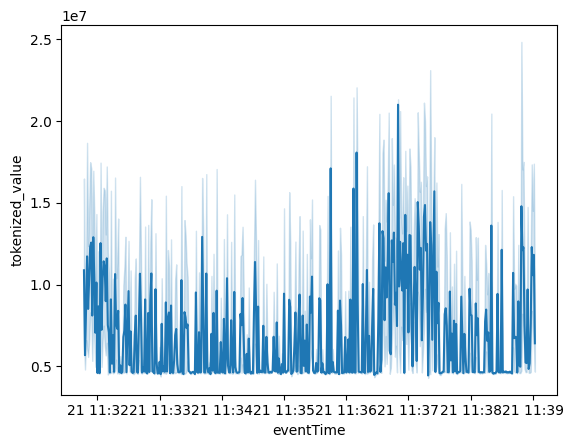

In [ ]:
sns.lineplot(
    y="tokenized_value",
    x="eventTime",
    data=df_new_data.to_pandas()[:5000]
  )

In [ ]:
sw = 7 # sliding windows

# this will prepare LSTM for the training and testing
for i in range(1, sw+1):
  df_new_data = df_new_data.with_columns(
    pl.Series(df_new_data["tokenized_value"]).shift(i).alias(f"t-{i}")
  )

df_new_data = df_new_data.drop_nulls()
df_new_data.head(2)

eventTime,sourceIPAddress,concatenated_list,tokenized_value,t-1,t-2,t-3,t-4,t-5,t-6,t-7
"datetime[μs, UTC]",str,str,f64,f64,f64,f64,f64,f64,f64,f64
2019-08-21 11:31:47 UTC,"""5.205.62.253""","""Boto3/1.9.201 …",2.0686352e7,4.531885e6,4.578353e6,2.212806e7,4.804994e6,2.294152e7,9.160587e6,4.531885e6
2019-08-21 11:31:47 UTC,"""5.205.62.253""","""Boto3/1.9.201 …",4.531885e6,2.0686352e7,4.531885e6,4.578353e6,2.212806e7,4.804994e6,2.294152e7,9.160587e6


In [ ]:
shifted_df_as_np = df_new_data.to_numpy()
shifted_df_as_np

array([[datetime.datetime(2019, 8, 21, 11, 31, 47), '5.205.62.253',
        'Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-157-generic Botocore/1.12.201 You are not authorized to perform this operation. Encoded authorization failure message: XIg4TxLJ2aEqqq4lR7Om7p_2yFF3XKCxI2kKRKyIBrx61jEE9ipijSYtNlyeHkCVUCY5jcAWQQlS3edPthsPNwILnilu4Tq903RZXHsCymd4KjN33a5l2Aoip3Lzme_g9g6bpFgooVQT46mLx9Yw7ofZWOCoxryomZlGZZKYmBD2s5duB9LUkJQQSpbhjhXbtEgkweoifgxyWZpGMouWXGyzREhU-e8D9vZMMQ5gEQbwdQeKujSeAtStyHKV_8uDEfj6n-koicBd4QyDxafxO-5u14NdOwrxfPkXx2oo2f5ORGbl7o0Ly-5T6M7PD-124l7H8vsBnw1Auezzq-03slWo5pqyReIs0LIOVLN5CS61UaDGFsYnwRxdl6eXUWoWPUlXyfi7Mkb9qma_S2txQhuXHKPontKq4rHL2bWMy8U7piIO2DTN45P3-oIy2fZ5ykzUNVaOfy5f-Oms-RS3Zmhm1oW0tMwKTHLeMnTwj7uGr5-H-tg6T3GYl-CUFt2L3Yu6StZ4DUtQ-QTtrgbwvNg8hiWOwnNGhgx7BwfZJBofsU48mM6PiPAnD5WcuEn4DTBeiIDxRbjENo2_ADgAk6L0T0lvg2WnMfqHPGVzUwrxz81jEY_1W-oLH_wq1jsAfg-eFRnGlENP143CrIwihWv7sVQ AwsApiCall Client.UnauthorizedOperation RunInstances ec2.amazonaws.com us-west-1',
        ..., 

In [ ]:
df_to_numpy_to_scale = shifted_df_as_np[:, 3:] # take only the columns with real interesting data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(df_to_numpy_to_scale)

In [ ]:
shifted_df_as_np[0].shape

(8,)

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X = dc(np.flip(X, axis=1)) # this function will flip the columns. Now the older value is t-1, the newest is t-7

In [ ]:
where_to_split = 0.65

split_index = int(len(X)*where_to_split)
split_index

1260480

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # check on dimension

((1260480, 7), (678720, 7), (1260480,), (678720,))

In [ ]:
# Reshape since the LSTM in pythorch need one extra dimension

X_train = X_train.reshape((-1, sw, 1))
X_test = X_test.reshape((-1, sw, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape # another dimensional check

((1260480, 7, 1), (678720, 7, 1), (1260480, 1), (678720, 1))

In [ ]:
# Transfrom to pytorch
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1260480, 7, 1]),
 torch.Size([678720, 7, 1]),
 torch.Size([1260480, 1]),
 torch.Size([678720, 1]))

In [ ]:
class LogSeriesForecastingDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y
  def __len__(self):
    return len(self.X)

  def __getitem__(self, i):
    return self.X[i], self.y[i]

In [ ]:
train_dataset = LogSeriesForecastingDataset(X_train, y_train)
test_dataset = LogSeriesForecastingDataset(X_test, y_test)

In [ ]:
batch_size = 2048

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# check on data loaded
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([2048, 7, 1]) torch.Size([2048, 1])


In [ ]:
# check on data loaded
for _, batch in enumerate(test_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

torch.Size([2048, 7, 1]) torch.Size([2048, 1])


In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()

    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers

    self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

    out, _ = self.lstm(x, (h0, c0))
    out = self.fc(out[:, 1, :])
    return out

model = LSTM(1, 64, 2)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
when_to_see_info = 10000

def train_one_epoch():
  model.train(True)
  print(f"Epoch: {epoch+1}")
  running_loss = 0.0

  for batch_index, batch in tqdm(enumerate(train_loader)):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    output = model(x_batch)
    loss = loss_function(output, y_batch)
    running_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch_index % when_to_see_info == when_to_see_info -1:
      avg_loss_across_batches = running_loss/when_to_see_info
      print("Batch {0}, Loss {1:.10f}".format(
          batch_index+1,
          avg_loss_across_batches
      ))
      running_loss = 0.0

In [ ]:
def validate_one_epoch():
  model.train(False)
  running_loss = 0.0

  for batch_index in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)

    with torch.no_grad():
      output = model(x_batch)
      loss = loss_function(output, y_batch)
      running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

  print("Val Loss: {0:.10f}".format(avg_loss_across_batches))
  print('***************************************************')

In [ ]:
learning_rate = 1e-3
num_epochs = 350
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  train_one_epoch()
  validate_one_epoch()

  print("Saving current model")
  torch.save(model, "drive/MyDrive/model_log_lstm_1.pth")



Epoch: 1


616it [03:27,  2.97it/s]


Val Loss: 0.2785170078
***************************************************
Saving current model
Epoch: 2


616it [03:21,  3.06it/s]


Val Loss: 0.2756573558
***************************************************
Saving current model
Epoch: 3


616it [03:15,  3.16it/s]


Val Loss: 0.2767279148
***************************************************
Saving current model
Epoch: 4


616it [03:16,  3.13it/s]


Val Loss: 0.2750815451
***************************************************
Saving current model
Epoch: 5


616it [03:22,  3.04it/s]


Val Loss: 0.2771261930
***************************************************
Saving current model
Epoch: 6


616it [03:15,  3.15it/s]


Val Loss: 0.2758251429
***************************************************
Saving current model
Epoch: 7


616it [03:22,  3.04it/s]


Val Loss: 0.2761723101
***************************************************
Saving current model
Epoch: 8


616it [03:15,  3.16it/s]


Val Loss: 0.2763263285
***************************************************
Saving current model
Epoch: 9


616it [03:16,  3.13it/s]


Val Loss: 0.2753096223
***************************************************
Saving current model
Epoch: 10


616it [03:21,  3.06it/s]


Val Loss: 0.2762581706
***************************************************
Saving current model
Epoch: 11


616it [03:17,  3.12it/s]


Val Loss: 0.2757743001
***************************************************
Saving current model
Epoch: 12


616it [03:16,  3.13it/s]


Val Loss: 0.2773067653
***************************************************
Saving current model
Epoch: 13


616it [03:17,  3.12it/s]


Val Loss: 0.2777191401
***************************************************
Saving current model
Epoch: 14


616it [03:21,  3.06it/s]


Val Loss: 0.2774119675
***************************************************
Saving current model
Epoch: 15


616it [03:18,  3.11it/s]


Val Loss: 0.2789694369
***************************************************
Saving current model
Epoch: 16


616it [03:16,  3.13it/s]


Val Loss: 0.2784884572
***************************************************
Saving current model
Epoch: 17


616it [03:15,  3.15it/s]


Val Loss: 0.2784480751
***************************************************
Saving current model
Epoch: 18


616it [03:14,  3.16it/s]


Val Loss: 0.2785152495
***************************************************
Saving current model
Epoch: 19


616it [03:16,  3.13it/s]


Val Loss: 0.2784664631
***************************************************
Saving current model
Epoch: 20


616it [03:14,  3.16it/s]


Val Loss: 0.2775853574
***************************************************
Saving current model
Epoch: 21


616it [03:15,  3.15it/s]


Val Loss: 0.2772821188
***************************************************
Saving current model
Epoch: 22


616it [03:14,  3.16it/s]


Val Loss: 0.2770251334
***************************************************
Saving current model
Epoch: 23


616it [03:16,  3.14it/s]


Val Loss: 0.2779211700
***************************************************
Saving current model
Epoch: 24


616it [03:14,  3.16it/s]


Val Loss: 0.2732345760
***************************************************
Saving current model
Epoch: 25


616it [03:15,  3.16it/s]


Val Loss: 0.2754839063
***************************************************
Saving current model
Epoch: 26


616it [03:15,  3.16it/s]


Val Loss: 0.2752375901
***************************************************
Saving current model
Epoch: 27


616it [03:12,  3.19it/s]


Val Loss: 0.2766058445
***************************************************
Saving current model
Epoch: 28


616it [03:14,  3.17it/s]


Val Loss: 0.2744430602
***************************************************
Saving current model
Epoch: 29


616it [03:14,  3.17it/s]


Val Loss: 0.2742562294
***************************************************
Saving current model
Epoch: 30


616it [03:15,  3.15it/s]


Val Loss: 0.2747702301
***************************************************
Saving current model
Epoch: 31


616it [03:15,  3.15it/s]


Val Loss: 0.2758353949
***************************************************
Saving current model
Epoch: 32


616it [03:17,  3.12it/s]


Val Loss: 0.2758078277
***************************************************
Saving current model
Epoch: 33


616it [03:12,  3.20it/s]


Val Loss: 0.2755824924
***************************************************
Saving current model
Epoch: 34


616it [03:13,  3.18it/s]


Val Loss: 0.2747112811
***************************************************
Saving current model
Epoch: 35


616it [03:19,  3.09it/s]


Val Loss: 0.2768069506
***************************************************
Saving current model
Epoch: 36


616it [03:12,  3.21it/s]


Val Loss: 0.2748901546
***************************************************
Saving current model
Epoch: 37


616it [03:11,  3.21it/s]


Val Loss: 0.2754445672
***************************************************
Saving current model
Epoch: 38


616it [03:13,  3.18it/s]


Val Loss: 0.2761679888
***************************************************
Saving current model
Epoch: 39


616it [03:12,  3.20it/s]


Val Loss: 0.2765015364
***************************************************
Saving current model
Epoch: 40


616it [03:13,  3.19it/s]


Val Loss: 0.2760256231
***************************************************
Saving current model
Epoch: 41


616it [03:12,  3.20it/s]


Val Loss: 0.2759411931
***************************************************
Saving current model
Epoch: 42


616it [03:12,  3.21it/s]


Val Loss: 0.2770402133
***************************************************
Saving current model
Epoch: 43


616it [03:13,  3.18it/s]


Val Loss: 0.2763392925
***************************************************
Saving current model
Epoch: 44


616it [03:12,  3.21it/s]


Val Loss: 0.2756332755
***************************************************
Saving current model
Epoch: 45


616it [03:13,  3.19it/s]


Val Loss: 0.2754206955
***************************************************
Saving current model
Epoch: 46


420it [02:12,  3.43it/s]

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train[:500], label='Real Log Template')
plt.plot(predicted[:500], label='Predicted Log Template')
plt.xlabel('Time')
plt.ylabel('Log Template')
plt.legend()
plt.show()
# this is done with LSTM(1, 4, 1)

NameError: name 'torch' is not defined

In [ ]:
# create single value representation of the log: DONE
# create timeseries windows: DONE (using sw=7)
# Scaler: DONE
# Split dataset: DONE
# Torch.tensor: DONE
# Dataset/Dataloader w/ batchsize: DONE
# LSTM: DONE
# Save the model

In [ ]:
# NOTES:
# - learning_rate too high
# - data too lossy, need some more advanced templating tecnique
# - need more epoch/other parameters

# == From LogDeep ==
# Model
options['input_size'] = 1
options['hidden_size'] = 64
options['num_layers'] = 2
options['num_classes'] = 28

# Train
options['batch_size'] = 2048
options['accumulation_step'] = 1


In [ ]:
# FROM LogDeep

from torch.autograd import Variable


class deeplog(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_keys):
        super(deeplog, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, num_keys)

    def forward(self, features, device):
        input0 = features[0]
        h0 = torch.zeros(self.num_layers, input0.size(0),
                         self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, input0.size(0),
                         self.hidden_size).to(device)
        out, _ = self.lstm(input0, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


class loganomaly(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_keys):
        super(loganomaly, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm0 = nn.LSTM(input_size,
                             hidden_size,
                             num_layers,
                             batch_first=True)
        self.lstm1 = nn.LSTM(input_size,
                             hidden_size,
                             num_layers,
                             batch_first=True)
        self.fc = nn.Linear(2 * hidden_size, num_keys)
        self.attention_size = self.hidden_size

        self.w_omega = Variable(
            torch.zeros(self.hidden_size, self.attention_size))
        self.u_omega = Variable(torch.zeros(self.attention_size))

        self.sequence_length = 28

    def attention_net(self, lstm_output):
        output_reshape = torch.Tensor.reshape(lstm_output,
                                              [-1, self.hidden_size])
        attn_tanh = torch.tanh(torch.mm(output_reshape, self.w_omega))
        attn_hidden_layer = torch.mm(
            attn_tanh, torch.Tensor.reshape(self.u_omega, [-1, 1]))
        exps = torch.Tensor.reshape(torch.exp(attn_hidden_layer),
                                    [-1, self.sequence_length])
        alphas = exps / torch.Tensor.reshape(torch.sum(exps, 1), [-1, 1])
        alphas_reshape = torch.Tensor.reshape(alphas,
                                              [-1, self.sequence_length, 1])
        state = lstm_output
        attn_output = torch.sum(state * alphas_reshape, 1)
        return attn_output

    def forward(self, features, device):
        input0, input1 = features[0], features[1]

        h0_0 = torch.zeros(self.num_layers, input0.size(0),
                           self.hidden_size).to(device)
        c0_0 = torch.zeros(self.num_layers, input0.size(0),
                           self.hidden_size).to(device)

        out0, _ = self.lstm0(input0, (h0_0, c0_0))

        h0_1 = torch.zeros(self.num_layers, input1.size(0),
                           self.hidden_size).to(device)
        c0_1 = torch.zeros(self.num_layers, input1.size(0),
                           self.hidden_size).to(device)

        out1, _ = self.lstm1(input1, (h0_1, c0_1))
        multi_out = torch.cat((out0[:, -1, :], out1[:, -1, :]), -1)
        out = self.fc(multi_out)
        return out


class robustlog(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_keys):
        super(robustlog, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, num_keys)

    def forward(self, features, device):
        input0 = features[0]
        h0 = torch.zeros(self.num_layers, input0.size(0),
                         self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, input0.size(0),
                         self.hidden_size).to(device)
        out, _ = self.lstm(input0, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
# move data from SKLearn Scaler back to normal data
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], sliding_windows+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions